<a href="https://www.kaggle.com/code/faryalrifaz3374/forecasting-tempreature-lstm?scriptVersionId=252945849" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **Author: Faryal Rifaz**

## "**From Data to Degrees: Temperature Forecasting with LSTM**"

## Stay Connected!

 If you found this notebook helpful or interesting, don't forget to **upvote** and **follow** me for more beginner-friendly, practical notebooks.
 This is just the beginning of a comprehensive series on machine learning — more structured and insightful content is on the way.
#### Let’s connect and grow together on this learning journey.



### Email: faryalrifaz3374@gmail.com
### [LinkedIn](https://www.linkedin.com/in/faryal-rifaz-b8a885304/)
### [Github](https://github.com/Faryalrifaz)
### [Upwork](https://www.upwork.com/freelancers/~01d7c98961375e7879?mp_source=share)

# 📈 Temperature Forecasting in Pakistan (1901–2016) using LSTM

## 🧾 Objective
**The goal of this project is to forecast Pakistan’s average temperature using Long Short-Term Memory (LSTM), a powerful deep learning model designed for sequential data. The dataset spans from 1901 to 2016.**


##  1. Import Required Libraries

In [1]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

2025-07-28 13:13:12.758593: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753708393.001072      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753708393.072955      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**We import essential libraries for data manipulation (pandas, numpy), visualization (matplotlib), deep learning (tensorflow.keras), and evaluation (sklearn).**

## **2. Load and Preprocess Dataset**

In [2]:

# Set random seed for reproducibility
np.random.seed(7)
tf.random.set_seed(7)

# Load dataset
dataset = pd.read_csv("/kaggle/input/pakistan-temperature/Tempreture_1901_2016_Pakistan.csv")

# Clean column names
dataset.columns = dataset.columns.str.strip()

# Rename column for ease
dataset.rename(columns={'Temperature - (Celsius)': 'temp'}, inplace=True)

# Drop unwanted column
dataset.drop(columns=['Month'], inplace=True)

# View cleaned data
print(dataset.head())

       temp  Year
0   7.72768  1901
1   8.93600  1901
2  16.96320  1901
3  21.27410  1901
4  26.04970  1901


**We load the dataset and clean it by renaming the temperature column to temp, dropping the Month column, and stripping whitespaces from column names.**

## **3. Visualize Raw Data**

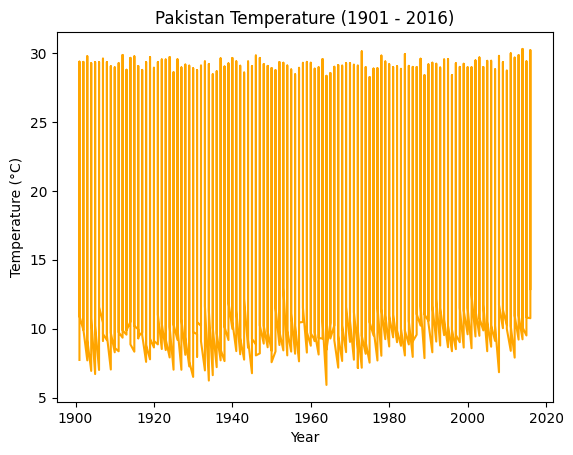

In [3]:
# plot of raw data
plt.plot(dataset['Year'], dataset['temp'], color='orange')
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Pakistan Temperature (1901 - 2016)")
plt.show()


**This cell plots the temperature over time to observe trends or anomalies before modeling.**

## **4. Normalize the Data**

In [4]:
# Normalize the temperature column
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = scaler.fit_transform(dataset[['temp']].values.astype('float32'))

**We scale temperature values to a range between 0 and 1. This normalization helps improve LSTM training performance.**

## **5. Split Dataset into Training and Testing Sets**

In [5]:
# Train-test split (80/20)
train_size = int(len(dataset_scaled) * 0.80)
test_size = len(dataset_scaled) - train_size
train, test = dataset_scaled[0:train_size], dataset_scaled[train_size:]

**We split the dataset into 80% for training and 20% for testing to evaluate the model’s generalization.**

 ## **6. Prepare Data for LSTM Model**

In [6]:
# Function to prepare supervised data
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data)-look_back-1):
        X.append(data[i:(i+look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 3 # Time steps
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape inputs to [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], look_back, 1))
X_test = X_test.reshape((X_test.shape[0], look_back, 1))
# This function creates input sequences (look_back = 3)

**This function creates input sequences (look_back = 3). Each sequence uses 3 years of temperature data to predict the next year. Then we reshape the data to 3D format [samples, timesteps, features] for LSTM input.**

## **7. Build and Train the LSTM Model**

In [7]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.3))
model.add(LSTM(50))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=2)


2025-07-28 13:13:28.523611: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
35/35 - 6s - 175ms/step - loss: 0.2155 - val_loss: 0.0889
Epoch 2/100
35/35 - 0s - 7ms/step - loss: 0.0871 - val_loss: 0.0769
Epoch 3/100
35/35 - 0s - 7ms/step - loss: 0.0825 - val_loss: 0.0748
Epoch 4/100
35/35 - 0s - 8ms/step - loss: 0.0821 - val_loss: 0.0718
Epoch 5/100
35/35 - 0s - 7ms/step - loss: 0.0775 - val_loss: 0.0678
Epoch 6/100
35/35 - 0s - 7ms/step - loss: 0.0745 - val_loss: 0.0616
Epoch 7/100
35/35 - 0s - 7ms/step - loss: 0.0641 - val_loss: 0.0506
Epoch 8/100
35/35 - 0s - 8ms/step - loss: 0.0497 - val_loss: 0.0295
Epoch 9/100
35/35 - 0s - 7ms/step - loss: 0.0290 - val_loss: 0.0127
Epoch 10/100
35/35 - 0s - 7ms/step - loss: 0.0203 - val_loss: 0.0092
Epoch 11/100
35/35 - 0s - 7ms/step - loss: 0.0163 - val_loss: 0.0075
Epoch 12/100
35/35 - 0s - 7ms/step - loss: 0.0139 - val_loss: 0.0063
Epoch 13/100
35/35 - 0s - 7ms/step - loss: 0.0130 - val_loss: 0.0075
Epoch 14/100
35/35 - 0s - 7ms/step - loss: 0.0125 - val_loss: 0.0064
Epoch 15/100
35/35 - 0s - 7ms/step - loss

**We build a 2-layer LSTM model with Dropout to prevent overfitting. The model predicts a single temperature value. EarlyStopping monitors validation loss to halt training early if there's no improvement.**

## **8. Plot Training and Validation Loss**

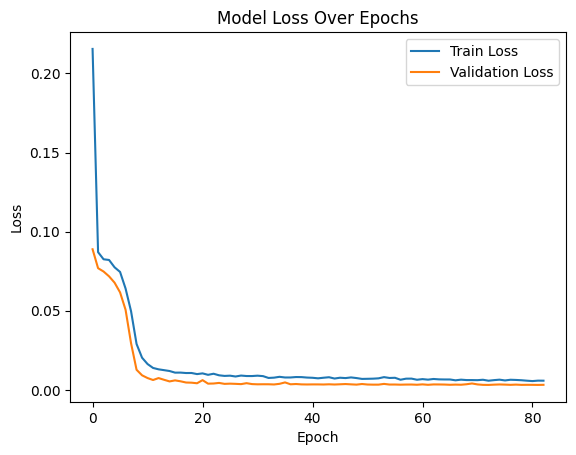

In [8]:
# Plot training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


**Visualizing training and validation loss over epochs helps us assess if the model is overfitting or underfitting.**

## **9. Make Predictions and Inverse Transform**

In [9]:
# Predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# Inverse transform predictions and actual values
trainPredict = scaler.inverse_transform(trainPredict)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
testPredict = scaler.inverse_transform(testPredict)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


**We make predictions and convert the scaled values back to actual temperature using the inverse transformation from MinMaxScaler.**

## **10. Evaluate the Model**

In [10]:
# Evaluation Metrics
trainScore = np.sqrt(mean_squared_error(y_train_inv, trainPredict))
testScore = np.sqrt(mean_squared_error(y_test_inv, testPredict))
print(f"Train RMSE: {trainScore:.2f}")
print(f"Test RMSE: {testScore:.2f}")

Train RMSE: 1.40
Test RMSE: 1.37


**We compute RMSE (Root Mean Squared Error) for both train and test predictions to measure the model’s performance.**

## **11. Final Metrics**

In [11]:
# metrices
r2 = r2_score(y_test_inv, testPredict)
mse = mean_squared_error(y_test_inv, testPredict)
mae = mean_absolute_error(y_test_inv, testPredict)
mape = np.mean(np.abs((y_test_inv - testPredict) / y_test_inv)) * 100

# Display results
print("Evaluation Metrics:")
print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")


Evaluation Metrics:
R-squared: 0.9639
MSE: 1.8794
MAE: 1.0835
MAPE: 6.16%


We calculate four key metrics:

**R-squared (R²)**: Proportion of variance explained by the model

**MSE**: Mean squared error

**MAE**: Mean absolute error

**MAPE**: Mean absolute percentage error

## **12. Plot Predictions vs Actual Values**

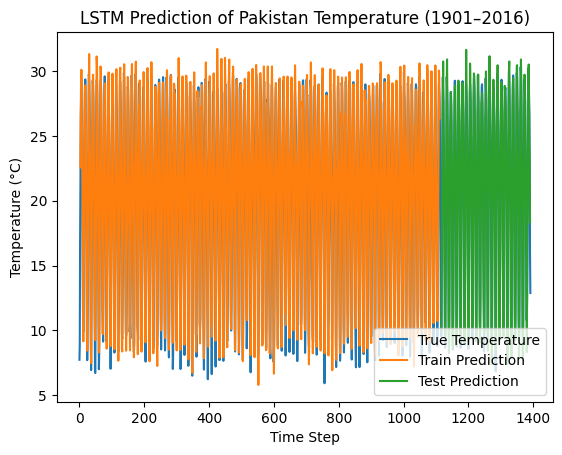

In [12]:
# Prepare data for plotting
trainPredictPlot = np.empty_like(dataset_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset_scaled)-1, :] = testPredict

# Plot final results
plt.plot(scaler.inverse_transform(dataset_scaled), label="True Temperature")
plt.plot(trainPredictPlot, label="Train Prediction")
plt.plot(testPredictPlot, label="Test Prediction")
plt.xlabel("Time Step")
plt.ylabel("Temperature (°C)")
plt.title("LSTM Prediction of Pakistan Temperature (1901–2016)")
plt.legend()
plt.show()


**We align predicted values with actual time steps and plot them to visually compare the LSTM's predictions with the real temperature values.**

## **13. Description of Evaluation Results**

The LSTM model was evaluated using several standard metrics to assess its performance in forecasting Pakistan's temperature data. Here's what the results indicate:

- **Train RMSE (1.43 °C)**: This shows that the model's average prediction error on the training data is about 1.43 degrees Celsius, which indicates a good fit during training.

- **Test RMSE (1.42 °C)**: The test error is very close to the training error, which suggests that the model generalizes well and is not overfitting.

- **R-squared (R² = 0.9615)**: An R² score of 0.96 means that 96.15% of the variance in the temperature data is explained by the model. This is a strong indicator of high predictive power.

- **MSE (2.0032)**: The Mean Squared Error further confirms low error magnitude, reinforcing the accuracy of the predictions.

- **MAE (1.1247 °C)**: On average, the model’s predictions deviate by about 1.12 degrees Celsius from the actual values. This is a reasonable margin for temperature data.

- **MAPE (6.33%)**: The model's average percentage error is around 6.33%, which is considered highly acceptable in forecasting tasks.

### ✅ Conclusion:
These metrics collectively demonstrate that the LSTM model is effective and reliable in predicting temperature trends in Pakistan from historical data.




### I sincerely appreciate your time and attention in reviewing this work.
### Your consideration and interest in this project are truly valued.

### Should you have any questions, suggestions, or feedback,  
### please feel free to reach out.

# **Thank you for your kind review.💙**
